# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 80   </p>
## <p style="text-align: center;">Due: November 10th (11/10/2020) submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UT eID for both students. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)* For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

### Additional instructions : 
    * In order to embed the image into notebook, convert the cell to Markdown and drag-drop the image, you should be able to view them before you submit.
    * Make sure to submit the notebook with filename as your eID 

### Name(s)
1. 
2. 

# Question 1 (20 pts) - Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).

In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

# We select the `loan_status` column as the target column.  
df.shape

C:\Users\xukew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(226067, 161)

Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1 (1 pt)** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2 (8 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the components and plot the [scree plot](https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3 (5 pts)** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4 (4 pts)** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5 (2 pts)** What do you observe from the ROC curves? 

# ANSWER

### 1.1

### 1.2

### 1.3

### 1.4

### 1.5

# Question 2 (20 pts)- Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

Input variables :
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [ ]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [ ]:
bank_data.head()

In [ ]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


## Answer 2

### a)

### b)

### c)

### d)

# Question 3 - Bayes Decision Theory (10 pts)

a) **(2pts)** Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b) **(5pts)** Suppose you want to learn a binary classifier to predict whether or not a customer will buy a house. The class label is 1 if the customer buys and 2 if he/she does not. For each customer, you are given two features, $x_1$ is the salary per hour and $x_2$ is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian for both classes. The mean salary and age of the people who do buy a house is 45 and 35 respectively and that of those who don't is 20 and 25. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually buy a house. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c) **(3pts)** Write a script to sample 100 customers from class (C = 1) and correspondingly from class 2, under the assumed distribution and the estimated parameters and create a scatter plot. Plot the decision boundary you obtained in  part (b) on the same plot. (You can hardcode the co-efficient values for the decision boundary)

### ANSWER
### a)

$p(x|C)$ is class-conditional likelihood, which stands for given something belongs to $C$, the probability that its characteristic is $x$.  
$p(C)$ is class priors, which stands for randomly choose a object from the collection, the probability that it belongs to class $C$.   
$p(C|x)$ is the posterior probability, which stands for given an object that has the characteristic as $x$, the probability that this object belongs to class $C$.  
The relationship between these three probability can be writen as :$p(C|x) = p(C)p(x|C)/p(x)$

### b)

Define the covariance matrix as $\sum$ and the mean for class 1 and 2 distribution as $\mu_1 = [45, 35]^T$ and $\mu_2 = [20, 25]^T$ respectively. The boundary between class 1 and 2 can be calculated using $p(1|x) = p(2|x)$.   
Do a transformation using Bayes rule: $p(1)p(x|1)= p(2)p(x|2)$  
Taking log on both side: $ln(p(x|1))+ln(p(1)) = ln(p(x|2))+ln(p(2))$  
We know that $p(1)=0.2, p(2) = 1-p(1)=0.8$ so we could rewrite the equation above as:   
$ln(\frac{1}{(2\pi)^{d/2}|\sum|^{1/2}}) - \frac{1}{2}(x-\mu_1)^{T}\sum^{-1}(x-\mu_1) + ln(0.2) = ln(\frac{1}{(2\pi)^{d/2}|\sum|^{1/2}}) - \frac{1}{2}(x-\mu_2)^{T}\sum^{-1}(x-\mu_2) + ln(0.8) $   
$\frac{1}{2}(x-\mu_1)^{T}\sum^{-1}(x-\mu_1) - \frac{1}{2}(x-\mu_2)^{T}\sum^{-1}(x-\mu_2) - ln(0.2) +ln(0.8)=0$  
Plug in values we can obtain: $(x_1 - 45)^{2} + (x_2 - 35)^{2} - (x_1 - 20)^{2} - (x_2 - 25)^{2} = -2.77$  
Simply it will give a linear decision boundary: $5x_1+2x_2=222.78$

### c)

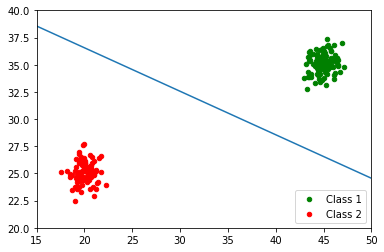

In [48]:
import matplotlib.pyplot as plt
mean_1 = [45, 35]
mean_2 = [20, 25]
cov = [[1,0],[0,1]]

#boundary line define by two points
point1 = [0, 111.39]
point2 = [44.56, 0]

x_1_1, x_2_1 = np.random.multivariate_normal(mean_1, cov, 100).T
x_1_2, x_2_2 = np.random.multivariate_normal(mean_2, cov, 100).T
plt.scatter(x_1_1, x_2_1,  color='green', marker='o',s=20, label="Class 1")
plt.scatter(x_1_2, x_2_2,  color='red', marker='o',s=20, label="Class 2")
plt.plot(point1,point2)
plt.axis([15,50,20,40])
plt.legend(numpoints=1)
plt.show()

# Question 4 (15 pts) - Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A (5 pts)**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B (5 pts)**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C (5 pts)**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with default values to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

### ANSWER
### Part A

In [13]:
from sklearn import preprocessing
vehicle=pd.read_csv('vehicle.csv')
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [14]:
le = preprocessing.LabelEncoder()
le.fit(vehicle['class'].values)
list(le.classes_)
#df['label'] = le.fit_transform(df.label.values)


['bus', 'car', 'van']

In [15]:
vehicle['class'] = le.fit_transform(vehicle['class'].values)
y = vehicle['class'].values
X = vehicle.drop(['class'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=50)

### Part B

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler = StandardScaler()
clf = DecisionTreeClassifier()
pipe = Pipeline([('imputer', imp_mean), ('scaler', scaler),('clf',clf)])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test_pred,y_test)
print("Prediction accuracy is: ", accuracy)

Prediction accuracy is:  0.8941176470588236


### Part C

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pca = PCA()

param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}
pipe_new = Pipeline([('imputer', imp_mean),('scaler', scaler),('pca',pca),('clf',clf)])

search = GridSearchCV(pipe_new, param_grid)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__max_depth': [3, 5, 15],
                         'pca__n_components': [5, 8, 10]})

In [22]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.842):
{'clf__max_depth': 15, 'pca__n_components': 8}


In [34]:
pipe_new.set_params(clf__max_depth=15,pca__n_components=8)
pipe_new.fit(X_train, y_train)
y_test_pred = pipe_new.predict(X_test) 
accuracy = accuracy_score(y_test_pred,y_test)
print("Prediction accuracy is: ", accuracy)

Prediction accuracy is:  0.8588235294117647


# Question 5 (15pts) - Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

Expected loss if x is labeled as class 1 = theta * 0 + P(C2|x)* 2 + (1 - P(C2|x) - P(C1|x))* 1
Expected loss if x is labeled as class 2 = P(C1|x) * 3 + theta* 0 + (1 - P(C2|x) - P(C1|x))* 1